In [1]:
import backtrader as bt
import pandas as pd
import yfinance as yf


c:\Users\Hung-Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\backtrader-1.9.78.123-py3.12.egg\backtrader\cerebro.py:670: SyntaxWarning: invalid escape sequence '\*'
c:\Users\Hung-Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\backtrader-1.9.78.123-py3.12.egg\backtrader\cerebro.py:712: SyntaxWarning: invalid escape sequence '\*'
c:\Users\Hung-Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\backtrader-1.9.78.123-py3.12.egg\backtrader\cerebro.py:670: SyntaxWarning: invalid escape sequence '\*'
c:\Users\Hung-Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\backtrader-1.9.78.123-py3.12.egg\backtrader\cerebro.py:712: SyntaxWarning: invalid escape sequence '\*'


In [2]:
tsla_daily = yf.download('TSLA',start='2021-01-01')
tsla_hourly = yf.download('TSLA',start='2021-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
tsla_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792 entries, 2021-01-04 to 2024-02-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       792 non-null    float64
 1   High       792 non-null    float64
 2   Low        792 non-null    float64
 3   Close      792 non-null    float64
 4   Adj Close  792 non-null    float64
 5   Volume     792 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 43.3 KB


In [4]:
tsla_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 793 entries, 2021-01-04 to 2024-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       793 non-null    float64
 1   High       793 non-null    float64
 2   Low        793 non-null    float64
 3   Close      793 non-null    float64
 4   Adj Close  793 non-null    float64
 5   Volume     793 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 43.4 KB


In [5]:
### parse the data into BT format
tsla_daily_parsed = bt.feeds.PandasData(dataname=tsla_daily,
                                        datetime=None,
                                        open=0,
                                        high=1,
                                        low=2,
                                        close=4,
                                        volume=5,
                                        openinterest=None)

In [6]:
tsla_hourly_parsed = bt.feeds.PandasData(dataname=tsla_hourly,
                                        datetime=None,
                                        open=0,
                                        high=1,
                                        low=2,
                                        close=4,
                                        volume=5,
                                        openinterest=None,
                                        timeframe=bt.TimeFrame.Minutes)

In [7]:
### add data
cerebro = bt.Cerebro()


In [8]:
cerebro.adddata(tsla_daily_parsed)

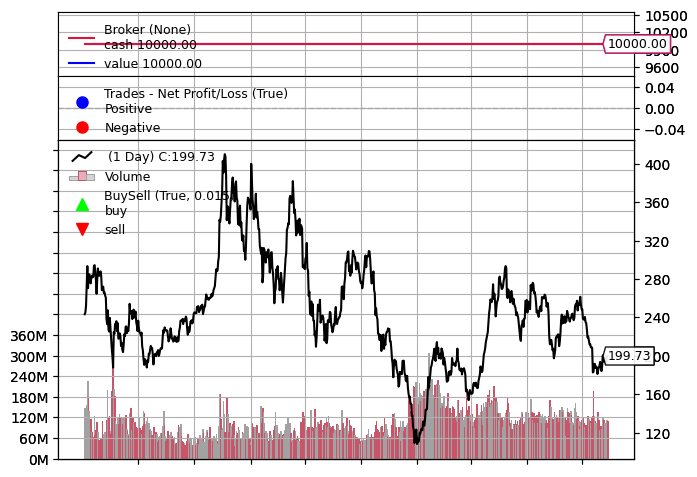

[[<Figure size 800x600 with 8 Axes>]]

In [10]:
cerebro.run()

%matplotlib widget
%matplotlib inline
cerebro.plot(iplot=False)

In [11]:
cerebro.adddata(tsla_hourly_parsed)


In [12]:
### resample data
# compress into 1 week: start of day, 5 days per week
cerebro.resampledata(dataname=tsla_hourly_parsed,timeframe=bt.TimeFrame.Days,compression=5)

In [13]:
cerebro.adddata(tsla_daily_parsed)

In [14]:
cerebro.run()

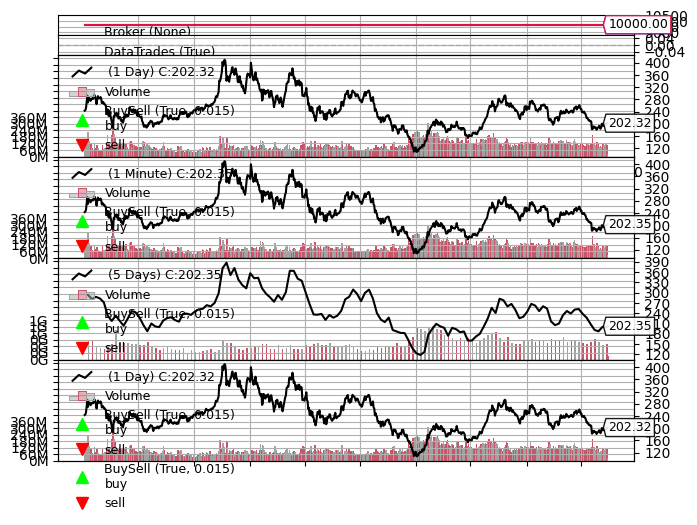

[[<Figure size 640x480 with 10 Axes>]]

In [35]:
%matplotlib widget
%matplotlib inline
cerebro.plot(iplot=False)